# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | First the good news, the clu..."
1,✅ Trip Verified | I have never travelled wit...
2,"✅ Trip Verified | Terrible overall, medium ser..."
3,✅ Trip Verified | London Heathrow to Male In...
4,Not Verified | Very good flight following an ...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df["reviews"] = df["reviews"].str.split("|", expand=True)[1]
df.head()

,reviews
0,"First the good news, the club suites are such..."
1,I have never travelled with British airways...
2,"Terrible overall, medium service and the flig..."
3,London Heathrow to Male In new business cla...
4,Very good flight following an equally good f...


In [6]:
import string

def case_and_punctuation_handling(text):
    lower_case_text = text.lower()
    cleaned_text = lower_case_text.translate(str.maketrans("", "", string.punctuation))
    return cleaned_text

df["cleaned_reviews"] = df["reviews"].apply(case_and_punctuation_handling)
df.head()

,reviews,cleaned_reviews
0,"First the good news, the club suites are such...",first the good news the club suites are such ...
1,I have never travelled with British airways...,i have never travelled with british airways...
2,"Terrible overall, medium service and the flig...",terrible overall medium service and the fligh...
3,London Heathrow to Male In new business cla...,london heathrow to male in new business cla...
4,Very good flight following an equally good f...,very good flight following an equally good f...


In [7]:
import nltk

# Downloading all nltk packages to avoid compatibility issues.
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [8]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet

In [9]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
# POS tagging dictionary.
pos_dict = {"J":wordnet.ADJ, "V":wordnet.VERB, "N":wordnet.NOUN, "R":wordnet.ADV}

def handle_tokenization_stopwords_postags(text):
    # Tokenization.
    tokenized_text = word_tokenize(text)
    # POS-tagging.
    tags = pos_tag(tokenized_text)
    new_text_list = []
    for word, tag in tags:
        # Stopword removal.
        if word not in stopwords.words("english"):
          new_text_list.append(tuple([word, pos_dict.get(tag[0])]))
    return new_text_list 

df["POS_tagged_reviews"] = df["cleaned_reviews"].apply(handle_tokenization_stopwords_postags)
df.head()

,reviews,cleaned_reviews,POS_tagged_reviews
0,"First the good news, the club suites are such...",first the good news the club suites are such ...,"[(first, r), (good, a), (news, n), (club, n), ..."
1,I have never travelled with British airways...,i have never travelled with british airways...,"[(never, r), (travelled, v), (british, a), (ai..."
2,"Terrible overall, medium service and the flig...",terrible overall medium service and the fligh...,"[(terrible, a), (overall, a), (medium, n), (se..."
3,London Heathrow to Male In new business cla...,london heathrow to male in new business cla...,"[(london, n), (heathrow, n), (male, v), (new, ..."
4,Very good flight following an equally good f...,very good flight following an equally good f...,"[(good, a), (flight, n), (following, v), (equa..."


In [10]:
# Obtaining stem-words with Lemmatization.
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def text_lemmatization(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df["lemmatized_reviews"] = df["POS_tagged_reviews"].apply(text_lemmatization)
df.head()

,reviews,cleaned_reviews,POS_tagged_reviews,lemmatized_reviews
0,"First the good news, the club suites are such...",first the good news the club suites are such ...,"[(first, r), (good, a), (news, n), (club, n), ...",first good news club suite huge improvement ...
1,I have never travelled with British airways...,i have never travelled with british airways...,"[(never, r), (travelled, v), (british, a), (ai...",never travel british airway first time choos...
2,"Terrible overall, medium service and the flig...",terrible overall medium service and the fligh...,"[(terrible, a), (overall, a), (medium, n), (se...",terrible overall medium service flight delay...
3,London Heathrow to Male In new business cla...,london heathrow to male in new business cla...,"[(london, n), (heathrow, n), (male, v), (new, ...",london heathrow male new business class ba c...
4,Very good flight following an equally good f...,very good flight following an equally good f...,"[(good, a), (flight, n), (following, v), (equa...",good flight follow equally good flight rome ...


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vader_analysis(sentiment_text):
    score = analyzer.polarity_scores(sentiment_text)
    return score["compound"]

df["VADER_compound_score"] = df["lemmatized_reviews"].apply(vader_analysis)

# function to analyse
def sentiment_classifier(compound_score):
    if compound_score >= 0.5:
        return "Positive"
    elif compound_score < 0 :
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["VADER_compound_score"].apply(sentiment_classifier)
df.head()

,reviews,cleaned_reviews,POS_tagged_reviews,lemmatized_reviews,VADER_compound_score,Sentiment
0,"First the good news, the club suites are such...",first the good news the club suites are such ...,"[(first, r), (good, a), (news, n), (club, n), ...",first good news club suite huge improvement ...,0.9545,Positive
1,I have never travelled with British airways...,i have never travelled with british airways...,"[(never, r), (travelled, v), (british, a), (ai...",never travel british airway first time choos...,0.9836,Positive
2,"Terrible overall, medium service and the flig...",terrible overall medium service and the fligh...,"[(terrible, a), (overall, a), (medium, n), (se...",terrible overall medium service flight delay...,-0.4767,Negative
3,London Heathrow to Male In new business cla...,london heathrow to male in new business cla...,"[(london, n), (heathrow, n), (male, v), (new, ...",london heathrow male new business class ba c...,0.9854,Positive
4,Very good flight following an equally good f...,very good flight following an equally good f...,"[(good, a), (flight, n), (following, v), (equa...",good flight follow equally good flight rome ...,0.8271,Positive


In [12]:
sentiment_counts = df["Sentiment"].value_counts()
sentiment_counts

Sentiment
Positive    452
Negative    442
Neutral     106
Name: count, dtype: int64

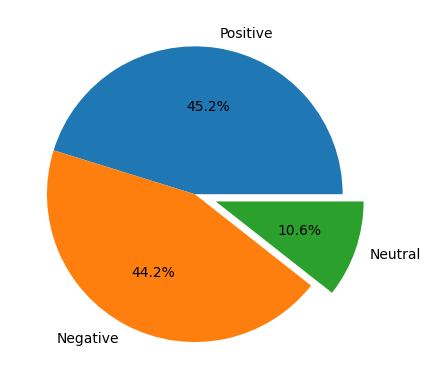

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns
  
# Declaring data. 
data = sentiment_counts.values
  
# Define Seaborn color palette to use. 
palette_color = sns.color_palette() 
  
# Plotting data on chart. 
plt.pie(data, labels=sentiment_counts.index, colors=palette_color, explode = (0, 0, 0.15), autopct="%.1f%%") 
  
# Displaying chart. 
plt.show() 

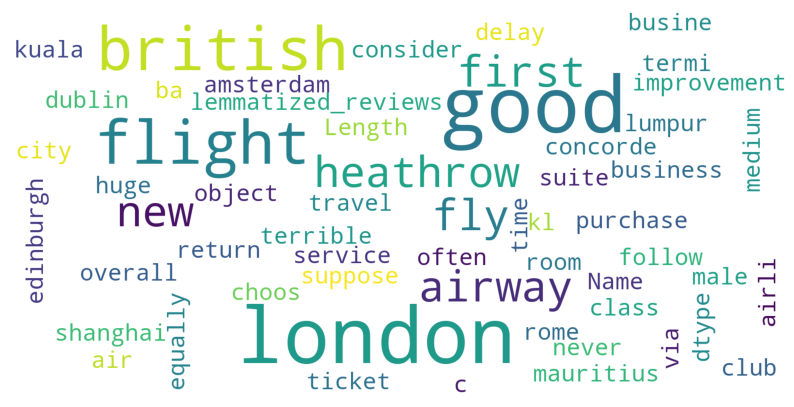

In [14]:
from wordcloud import WordCloud

def vizualize_wordcloud(data):
    wordcloud = WordCloud(background_color="white", max_words=200, max_font_size=40, scale=4, relative_scaling=0.9, random_state=7)
    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis("off")

    plt.imshow(wordcloud)
    plt.show()

vizualize_wordcloud(df["lemmatized_reviews"])